In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/komalmenger/Automatic-irrigation-and-crop-prediction/refs/heads/master/ML%20Codes%20and%20datasets/cpdata.csv')

In [4]:
df

,temperature,humidity,ph,rainfall,label
0,20.879744,82.002744,6.502985,202.935536,rice
1,21.770462,80.319644,7.038096,226.655537,rice
2,23.004459,82.320763,7.840207,263.964248,rice
3,26.491096,80.158363,6.980401,242.864034,rice
4,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...
3095,25.287846,89.636679,6.765095,58.286977,watermelon
3096,26.638386,84.695469,6.189214,48.324286,watermelon
3097,25.331045,84.305338,6.904242,41.532187,watermelon
3098,26.897502,83.892415,6.463271,43.971937,watermelon


In [5]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3100 entries, 0 to 3099
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  3100 non-null   float64
 1   humidity     3100 non-null   float64
 2   ph           3100 non-null   float64
 3   rainfall     3100 non-null   float64
 4   label        3100 non-null   object 
dtypes: float64(4), object(1)
memory usage: 121.2+ KB


In [6]:
df.describe()

,temperature,humidity,ph,rainfall
count,3100.000000,3100.000000,3100.000000,3100.000000
mean,27.108466,66.005312,6.368913,110.213031
std,7.566308,24.007713,0.809477,64.048562
min,8.825675,10.034048,3.504752,20.211267
25%,22.810495,55.244920,5.895343,64.909095
50%,26.102848,68.980529,6.342518,97.057093
75%,29.365644,84.446524,6.841616,141.210784
max,54.986760,99.981876,9.935091,397.315380


In [ ]:
from sklearn.preprocessing import LabelEncoder    # to ecode the lavels means the values which we have to predict by label encoding method.

le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])



In [ ]:
skewness = df.skew(numeric_only=True)

print("Skewness of all numeric features:\n")
print(skewness.sort_values(ascending=False))


In [ ]:
df['rainfall'] = np.log1p(df['rainfall']) 



In [ ]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')
df[['humidity']] = pt.fit_transform(df[['humidity']])


In [ ]:
df

In [ ]:
skewness = df.skew(numeric_only=True)

print("Skewness of all numeric features:\n")
print(skewness.sort_values(ascending=False))


In [ ]:
df['ph'] = np.log1p(df['ph'] - df['ph'].min() + 1)

In [ ]:
X=df[['temperature','humidity','ph','rainfall']]
y=df['label']

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Suppose X is your feature data (not labels)
X_scaled = scaler.fit_transform(X)


In [17]:
scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Check mean and std of each feature
print("Mean:\n", scaled_df.mean())
print("\nStandard Deviation:\n", scaled_df.std())


Mean:
 temperature   -4.400781e-16
humidity       0.000000e+00
ph             7.380476e-16
rainfall      -7.976415e-16
dtype: float64

Standard Deviation:
 temperature    1.000161
humidity       1.000161
ph             1.000161
rainfall       1.000161
dtype: float64


In [18]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Polynomial feature transformation
poly = PolynomialFeatures(degree=4)  # Change the degree as needed
X_poly = poly.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Train polynomial model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error: ", mse)
print("R-squared: ", r2)



Mean Squared Error:  37.18918634960242
R-squared:  0.539788170822731


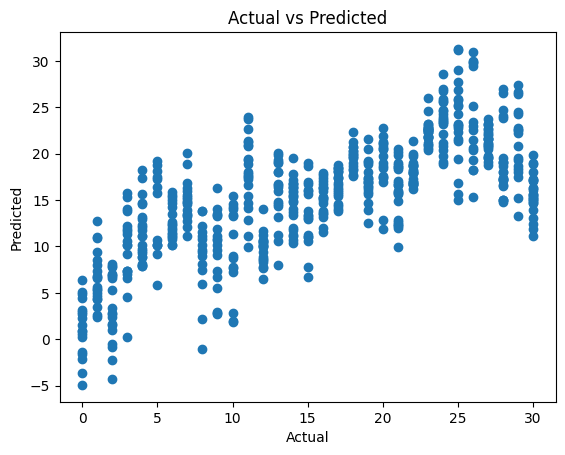

In [19]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()


In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Split the original X and y (no need for polynomial features here)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred_rf = rf_model.predict(X_test)

# Evaluation
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest - Mean Squared Error:", mse_rf)
print("Random Forest - R-squared:", r2_rf)


Random Forest - Mean Squared Error: 10.389697258064517
Random Forest - R-squared: 0.8714287122395448


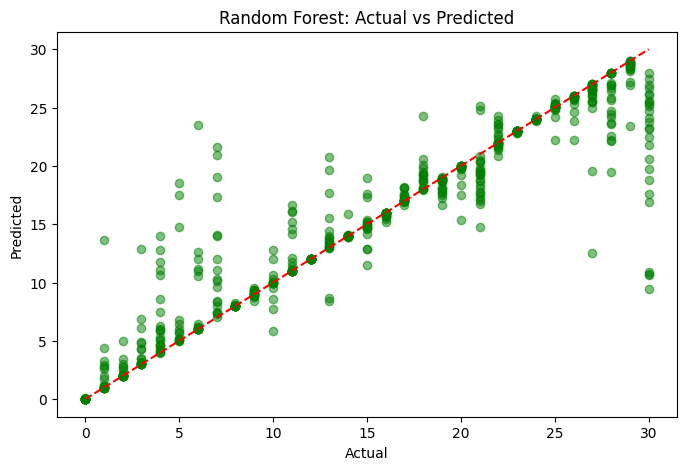

In [21]:
Random Forest - Mean Squared Error: 10.389697258064517
Random Forest - R-squared: 0.8714287122395448


In [22]:
feature_importances = rf_model.feature_importances_
features = X.columns

importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
print(importance_df.sort_values(by='Importance', ascending=False))


       Feature  Importance
1     humidity    0.409081
0  temperature    0.225151
3     rainfall    0.198272
2           ph    0.167495


In [23]:
import pickle

# Save the model
with open('model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

# Save the scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Save the label encoder
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(le, f)

